In [1]:
import os
path=os.listdir("./HW1_Dataset/")
for files in path:
    file=open("./HW1_Dataset/"+ files)
    data=file.read()
    n = len(data)
    print("./HW1_Dataset/"+ files + " " + str(n))
########################################################################
######################### Write your code here #########################
########################################################################

./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
./HW1_Dataset/The King James Version of the Bible (132).txt 4351846
./HW1_Dataset/Et dukkehjem. English by Henrik Ibsen (557).txt 161241
./HW1_Dataset/Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt 363234
./HW1_Dataset/The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt 1051148
./HW1_Dataset/The Odyssey by Homer (124).txt 697404
./HW1_Dataset/A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt 765918
./HW1_Dataset/The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt 545031
./HW1_Dataset/My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt 383694
./HW1_Dataset/Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt 1154508
./HW1_

In [2]:
import operator
d={}
import os
path=os.listdir("./HW1_Dataset/")
for files in path:
    file=open("./HW1_Dataset/"+ files)
    data=file.read()
    n = len(data)
    d[files]=n
d_sorted = sorted(d.items(), key=lambda x: x[1], reverse=True)
idx=1
for i in d_sorted[:15]:
     print(idx,".",i[1],i[0])
     idx+=1
    
########################################################################
######################### Write your code here #########################
########################################################################

1 . 5465100 The Complete Works of William Shakespeare by William Shakespeare (132).txt
2 . 4351846 The King James Version of the Bible (132).txt
3 . 3254333 Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
4 . 3227580 War and Peace by graf Leo Tolstoy (251).txt
5 . 3033575 Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
6 . 2643849 The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
7 . 1534140 Ulysses by James Joyce (282).txt
8 . 1378627 My Secret Life, Volumes I. to III. by Anonymous (157).txt
9 . 1238569 Moby Dick; Or, The Whale by Herman Melville (413).txt
10 . 1231784 Leviathan by Thomas Hobbes (417).txt
11 . 1214387 The Republic by Plato (246).txt
12 . 1200021 The History of the Peloponnesian War by Thucydides (122).txt
13 . 1175588 The Iliad by Homer (256).txt
14 . 1167141 The Federalist Papers by Alexander Hamilton and John Jay and James Madison (116).txt
15 . 1154508 Prestuplenie i nakazanie. English by Fyodor Dostoy

In [3]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


In [4]:
import numpy as np
import os
path=os.listdir("./HW1_Dataset/")
sum=0
for files in path:
    file=open("./HW1_Dataset/"+ files)
    data=file.read()
    #print(type(data))
    words_split_on_spaces = data.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / 10000))
    sum=sum+num_book_pieces
    
print("Total number of batches:",sum)
    


########################################################################
######################### Write your code here #########################
########################################################################

Total number of batches: 1246


In [5]:
import pandas as pd
import re
import spacy
import os
nlp = spacy.load('en_core_web_sm',disable=['ner', 'parser'])
s=0
import os
from collections import Counter
histogram = Counter()
path=os.listdir("./HW1_Dataset/")
for files in path:
    file=open("./HW1_Dataset/"+ files)
    #print(file)
    #s+=1
    text=file.read()
    #print(text)
    split_text = split_into_batches(text,10000)
    for text in split_text:
                parsed_text=nlp(text)
                for token in parsed_text:
                         if re.match ('[a-zA-Z]+$', token.lemma_):
                            if token.lemma_ not in histogram:
                                histogram[token.lemma_]=1
                            else:
                                histogram[token.lemma_]+=1

#print(list(histogram.items()))

count = pd.Series(histogram)
count = count.sort_values(ascending=False)

freq_table = pd.DataFrame(count)
freq_table.reset_index(inplace=True)
freq_table.columns = ['Word', 'Raw Count']
freq_table.index.rename('Rank', inplace=True)
freq_table.reset_index(inplace=True)
freq_table['Rank'] += 1
print(freq_table.head(50))

########################################################################
######################### Write your code here #########################
########################################################################

    Rank   Word  Raw Count
0      1    the     702454
1      2     be     435828
2      3    and     435412
3      4     of     386345
4      5     to     324401
5      6      I     255183
6      7      a     233206
7      8     in     204251
8      9     he     193594
9     10   that     158973
10    11   have     158124
11    12     it     135421
12    13    his     108544
13    14    you     102562
14    15   with     101226
15    16   they      96821
16    17    not      95519
17    18    for      95336
18    19     as      90450
19    20    she      78063
20    21    but      75589
21    22     my      74010
22    23     do      68692
23    24     at      64967
24    25     on      62840
25    26     by      61972
26    27   this      61239
27    28     we      60309
28    29  which      58829
29    30    all      58721
30    31    say      58440
31    32   from      50093
32    33     so      47921
33    34     or      47718
34    35    her      43178
35    36    one      41103
3

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

<AxesSubplot:xlabel='Rank', ylabel='Raw Count'>

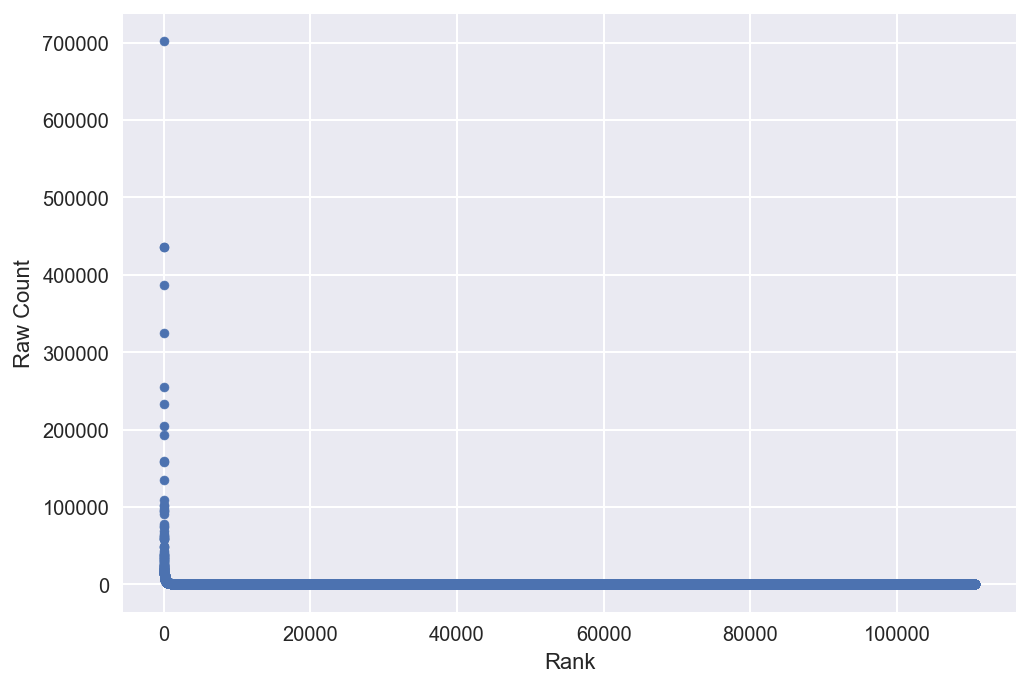

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')  
%config InlineBackend.figure_format = 'retina' 

freq_table.plot.scatter('Rank', 'Raw Count')
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################

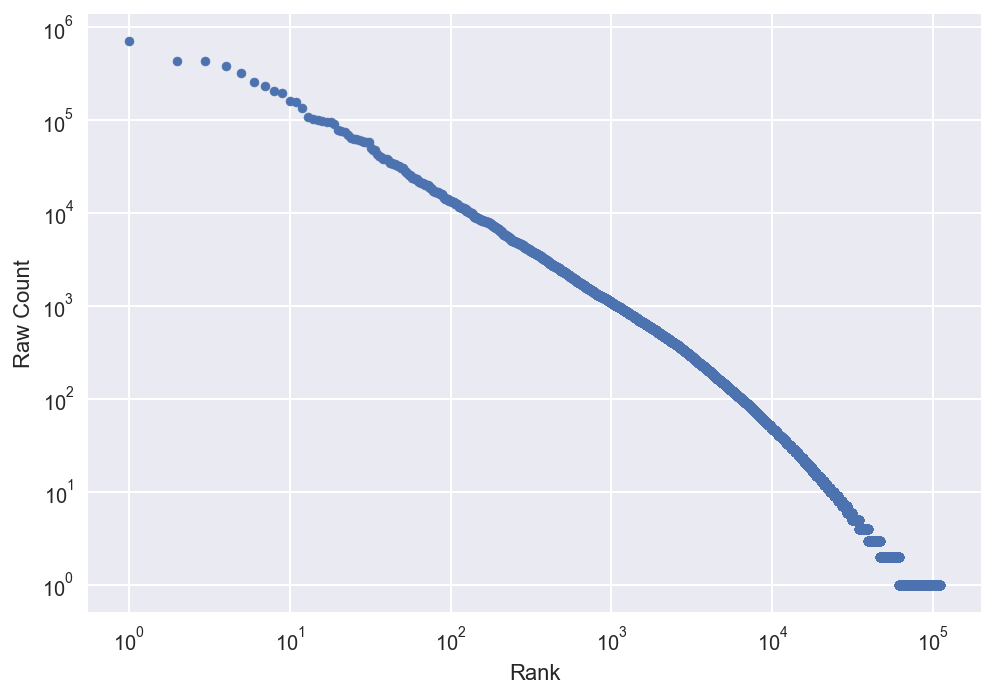

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')  
%config InlineBackend.figure_format = 'retina'  
freq_table.plot.scatter('Rank', 'Raw Count')
axis = plt.gca()  
axis.set_xscale('log')
axis.set_yscale('log')

# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################

In [8]:
print('Probability of drawing one of the 4 most frequent alphanumeric lemmas: ')
print(freq_table['Raw Count'][:4].sum() / freq_table['Raw Count'].sum())
########################################################################
######################### Write your code here #########################
########################################################################

print('Probability of drawing one of the 50 most frequent alphanumeric lemmas: ')
print(freq_table['Raw Count'][:50].sum() / freq_table['Raw Count'].sum())
########################################################################
######################### Write your code here #########################
########################################################################

Probability of drawing one of the 4 most frequent alphanumeric lemmas: 
0.16249654390822113
Probability of drawing one of the 50 most frequent alphanumeric lemmas: 
0.482060116721598


In [9]:
print("Occur only once: ")
print((freq_table['Raw Count'] == 1).sum() / len(freq_table))

########################################################################
######################### Write your code here #########################
########################################################################       
print("Occur fewer than 10 times: ")
print((freq_table['Raw Count'] < 10).sum() / len(freq_table))

########################################################################
######################### Write your code here #########################
########################################################################

Occur only once: 
0.4488923821913848
Occur fewer than 10 times: 
0.782307025151778


Entity Recognition and Pointwise Mutual Information (PMI) 

([<matplotlib.axis.XTick at 0x7fefb2c6cca0>,
 [Text(0, 0, 'ORG'),
  Text(1, 0, 'GPE'),
  Text(2, 0, 'LOC'),
  Text(3, 0, 'PERSON'),
  Text(4, 0, 'NORP'),
  Text(5, 0, 'QUANTITY'),
  Text(6, 0, 'DATE'),
  Text(7, 0, 'CARDINAL'),
  Text(8, 0, 'MONEY'),
  Text(9, 0, 'ORDINAL'),
  Text(10, 0, 'TIME'),
  Text(11, 0, 'LAW'),
  Text(12, 0, 'EVENT'),
  Text(13, 0, 'WORK_OF_ART'),
  Text(14, 0, 'PRODUCT'),
  Text(15, 0, 'LANGUAGE'),
  Text(16, 0, 'FAC'),
  Text(17, 0, 'PERCENT')])

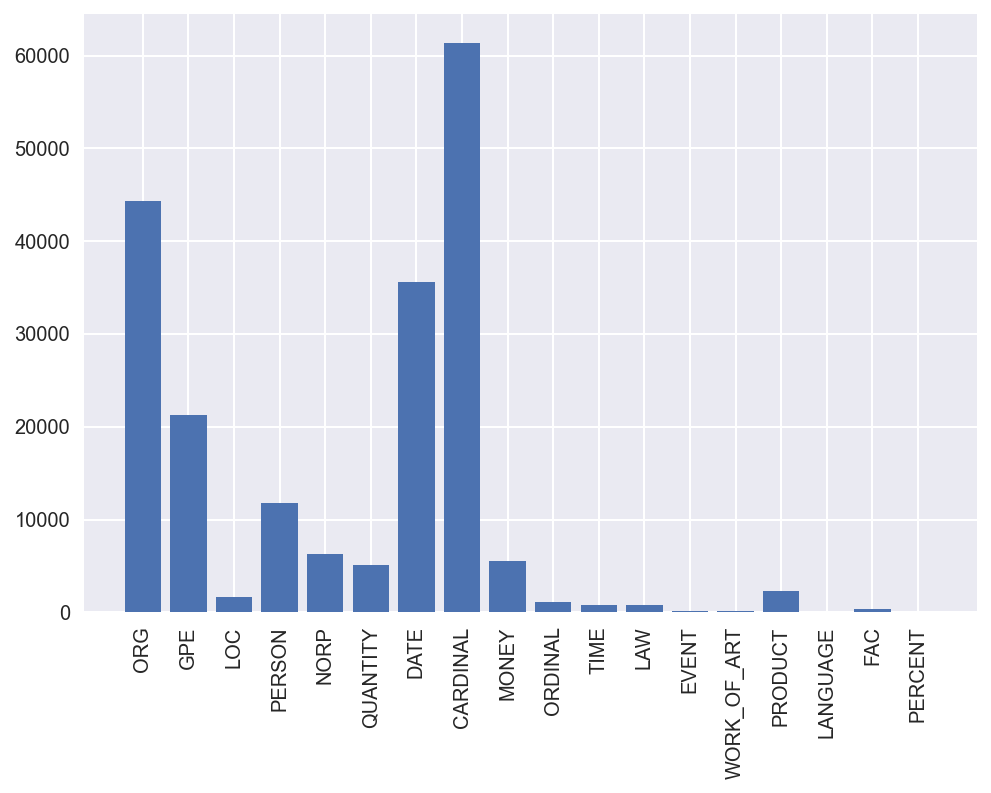

In [21]:
#import nltk
#nltk.download('reuters')
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()

#print(type(reuters_nlp))
########################################################################
######################### Write your code here #########################
########################################################################
for article in reuters_nlp:
    label_list = [ent.label_ for ent in article.ents]
    label_counter.update(label_list)
labels = [item[0] for item in label_counter.items()]
label_count = [item[1] for item in label_counter.items()]
plt.bar(range(len(labels)), label_count)
plt.xticks(range(len(labels)),labels, rotation=90)

In [22]:
from tabulate import tabulate
orgc = Counter()
gpec = Counter()

for article in reuters_nlp:
    org = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == "ORG"])
    gpe = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == "GPE"])
    orgc.update(org)
    gpec.update(gpe)
print("Top-10 most occuring organization(ORG) are:")
print(tabulate(orgc.most_common(10)))

print("Top-10 most occuring GPE are:")
print(tabulate(gpec.most_common(10)))



########################################################################
######################### Write your code here #########################
########################################################################

Top-10 most occuring organization(ORG) are:
--------------------------------------  ---
reuters                                 455
net shr                                 262
treasury                                256
the securities and exchange commission  249
ec                                      234
usda                                    195
fed                                     192
oper                                    186
the u.s. agriculture department         172
the bank of england                     136
--------------------------------------  ---
Top-10 most occuring GPE are:
-----------------  ----
u.s.               1623
japan               568
the united states   384
u.k.                310
canada              295
new york            246
west germany        238
washington          229
london              214
brazil              200
-----------------  ----


In [23]:
co_occurrence_counts = Counter()
gpe_counts = Counter()

for article in reuters_nlp:
    article_gpe = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == 'GPE'])
    article_org = set([ent.lemma_.lower() for ent in article.ents if ent.label_ == 'ORG'])
    gpe_counts.update(article_gpe)
    if 'opec' in article_org:
        co_occurrence_counts.update(article_gpe)

proba = dict()
for gpe, co_occurrence_count in co_occurrence_counts.items():
    #print(gpe,co_occurrence_count)
    proba[gpe] = co_occurrence_count / gpe_counts[gpe]

print('Rank', "\t",'Location')
for i, w in enumerate(sorted(proba, key=proba.get,reverse=True)[:50]):
    print(str(i+1),"\t", w,"\t")

########################################################################
######################### Write your code here #########################
########################################################################

Rank 	 Location
1 	 lajous 	
2 	 duri 	
3 	 the neutral zone 	
4 	 petromin 	
5 	 emirates 	
6 	 franco-american 	
7 	 east room 	
8 	 bethesda 	
9 	 gabon 	
10 	 maciej 	
11 	 opecna 	
12 	 venezuela"s 	
13 	 opec 	
14 	 yanbu 	
15 	 el salado 	
16 	 aguarico 	
17 	 jubail 	
18 	 napo province 	
19 	 tripoli 	
20 	 doha 	
21 	 guayaquil 	
22 	 tihamah 	
23 	 redoglia 	
24 	 new york harbor 	
25 	 materialy 	
26 	 vienna 	
27 	 riyadh 	
28 	 balao 	
29 	 saudi arabia's 	
30 	 dubai 	
31 	 quito 	
32 	 qatar 	
33 	 caracas 	
34 	 nigeria 	
35 	 kahan 	
36 	 alexandria 	
37 	 oseberg 	
38 	 isle city 	
39 	 la 	
40 	 dunham 	
41 	 carrington 	
42 	 ecuador 	
43 	 libya 	
44 	 saudi arabia 	
45 	 kuwait 	
46 	 venezuela 	
47 	 lagos 	
48 	 jakarta 	
49 	 the united arab emirates 	
50 	 jamaica 	
